In [1]:
# Importing the important libraries that we shall use in this investigation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import matplotlib
sns.set(style="ticks", color_codes=True)


UsageError: Line magic function `%` not found.


In [2]:
#Load dataset 
# Original Dataset from https://www.kaggle.com/tmdb/tmdb-movie-metadata
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#Data wranging. Lets investigate the data. 

#df.describe()
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [5]:
# Below shows significant amount of missing values. 
print('Count of missing values(zeros) in budget_adj colm')
df[df['budget_adj'] == 0].count()
#df[df['revenue_adj'] == 0].count()

Count of missing values(zeros) in budget_adj colm


id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

Note that we shall further clean the dataset when we further investigate the dataset. Cleaning or removing values right now will cause a significant decrease in data

In [6]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [7]:
# After discussing the structure of the data and any problems that need to be cleaned, 
# perform those cleaning steps in the second part of this section.
# Removing budget and renvuue since revenue_adj and budget_adj is more appropriate since it considers inflation 
df.drop(['imdb_id','budget', 'revenue', 'homepage'], axis=1, inplace=True)

In [8]:
#renaming to more descriptive coloumns.
df.rename(index=str, columns={"budget_adj": "total_budget", "revenue_adj": "total_revenue"}, inplace=True)
#changing type of date
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(2)

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,total_budget,total_revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   original_title        10866 non-null  object        
 3   cast                  10790 non-null  object        
 4   director              10822 non-null  object        
 5   tagline               8042 non-null   object        
 6   keywords              9373 non-null   object        
 7   overview              10862 non-null  object        
 8   runtime               10866 non-null  int64         
 9   genres                10843 non-null  object        
 10  production_companies  9836 non-null   object        
 11  release_date          10866 non-null  datetime64[ns]
 12  vote_count            10866 non-null  int64         
 13  vote_average         

In [10]:
#removing duplicate values
x = df.duplicated().sum()
print("No of Duplicate Values", x)
df.drop_duplicates(inplace=True)
y = df.duplicated().sum()
print("No of Duplicate Values after cleaning", y)

No of Duplicate Values 1
No of Duplicate Values after cleaning 0


# Exploratory Data Analysis

In [11]:
# Copy the dataframe so that the main dataframe remains unaffected
df_q2 = df.copy(deep=True)

In [12]:
# Cleaning data - and removing all those values which are empty in both revenue and budget. 
# The removal of values reduces the dataset to 50% therefore one can question the crediblity of the analysis. 

df_q2 = df_q2[df_q2['total_revenue'] != 0]
df_q2 = df_q2[df_q2['total_budget'] != 0]
#check the data
df_q2.head(2)

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,total_budget,total_revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


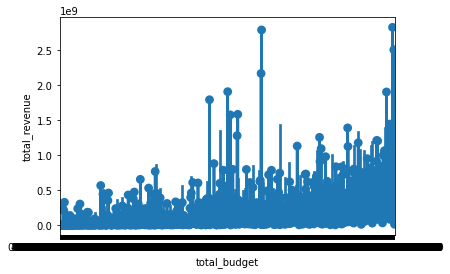

In [13]:
#Plot of budget and revenue
sns.pointplot(x="total_budget", y="total_revenue", data=df_q2);

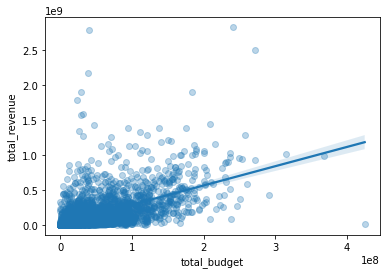

In [14]:
#Scatter plot of budget and revenue, shows better correlation
sns.regplot(x="total_budget", y="total_revenue", data=df_q2, scatter_kws={'alpha':0.3});

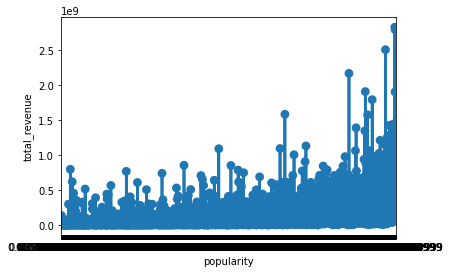

In [15]:
# Graph between populaity and revenue shows that there isn't any correlation betweeen these two values
#matplotlib.pyplot.scatter(df_q2['popularity'] ,df_q2['total_revenue']);
#matplotlib.pyplot.xlabel("Popularity")
#matplotlib.pyplot.ylabel("Revenue");
sns.pointplot(x="popularity", y="total_revenue", data=df_q2);

Lets remove the outliers present in our data.

In [16]:
#clear outliers
df_q2_removeOutliers = df_q2[df_q2['popularity'] < 15]

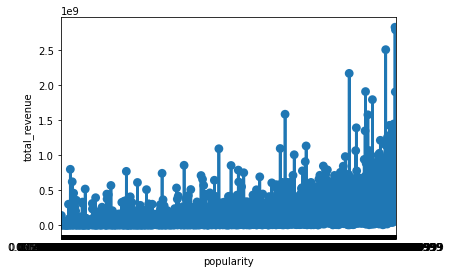

In [17]:
#matplotlib.pyplot.scatter(df_q2_removeOutliers['popularity'] ,df_q2_removeOutliers['total_revenue']);
#matplotlib.pyplot.xlabel("Popularity")
#matplotlib.pyplot.ylabel("Revenue");
sns.pointplot(x="popularity", y="total_revenue", data=df_q2_removeOutliers);

In [18]:
# Drop all null values. 
df_q2 = df_q2.dropna()
# Sieve through the dataset by using a group by function and find out the list of directors which produced the most
# movies in descending order. Since the number of directors in this dataset is huge, we shall only consider the top few who 
#have directed a greater number of movies. 
top_actors = (df_q2.groupby('director')['original_title'].count()).sort_values(ascending=False)

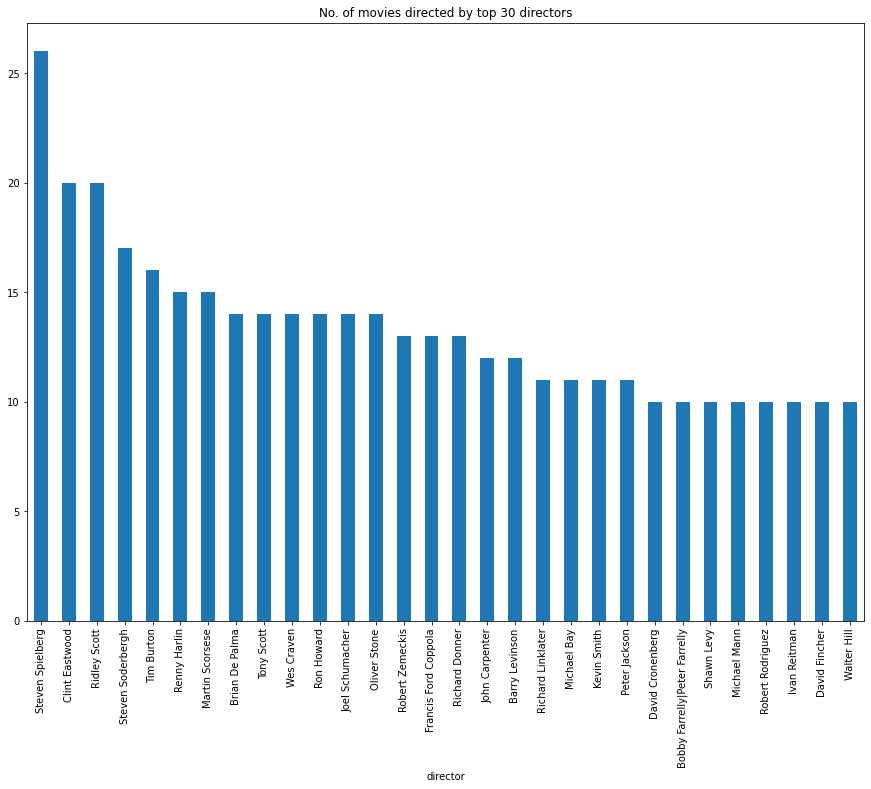

In [19]:
top_actors[:30].plot(kind='bar', figsize=(15,11), title='No. of movies directed by top 30 directors').yaxis.label.set_visible(False);

The below code first sieves through dataframe and extracts all those rows which contains the names of the top 21 directors. The for loop extracts the row from the dataframe and keeps on appended it to the df_topDirectors dataframe.

In [20]:
#Now create a new dataframe which only contain the rows belonging to the movies produced by these directors
df_temp = pd.DataFrame()
for actor,v in top_actors[:21].items():
    df_temp =df_temp.append(df_q2[df_q2['director'].str.contains(actor)],ignore_index=True)
df_topDirectors = df_temp

C:\Users\aruna\AppData\Local\Temp\ipykernel_5072\3022386479.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp =df_temp.append(df_q2[df_q2['director'].str.contains(actor)],ignore_index=True)


In [21]:
#convert to float datatype
df_topDirectors['total_revenue'] = df_topDirectors['total_revenue'].astype(str).astype('float64')
# take the mean of the revenue produced by all the movies directed by the director. 
df_topDirectorsRevenue = df_topDirectors.groupby(['director']).mean()
#Extract the relavent coloumns needed for plotting
df_topDirectorsRevenue =df_topDirectorsRevenue.drop(df_topDirectorsRevenue.columns.difference(['director','total_revenue']), 1)
# Sort the total_revenue coloumn in descending order
df_topDirectorsRevenue = df_topDirectorsRevenue.sort_values(by='total_revenue', ascending=1)

C:\Users\aruna\AppData\Local\Temp\ipykernel_5072\2029197610.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_topDirectorsRevenue =df_topDirectorsRevenue.drop(df_topDirectorsRevenue.columns.difference(['director','total_revenue']), 1)


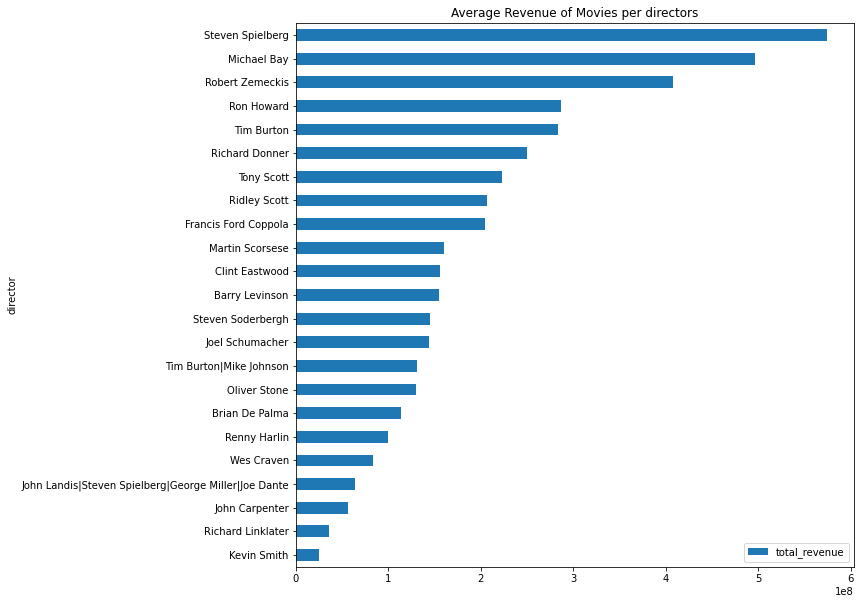

In [22]:
df_topDirectorsRevenue.plot(kind='barh', figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per directors' );

In [29]:
#Extract rows containing movies directed by Barray Levinson
Peter_Jackson=df_topDirectors[df_topDirectors['director'].str.contains('Peter Jackson')].sort_values(by='total_revenue', ascending=0)

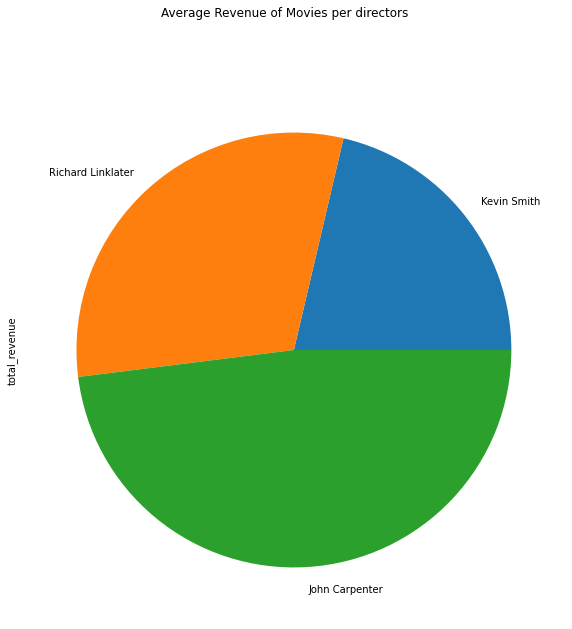

In [28]:
df_topDirectorsRevenue[:3].plot(kind='pie', subplots=True, figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per directors', legend=False );

In [32]:
#Extract rows containing movies directed by Barray Levinson
Peter_Jackson=df_topDirectors[df_topDirectors['director'].str.contains('Peter Jackson')].sort_values(by='total_revenue', ascending=0)

In [33]:
Peter_Jackson[['id', 'director', 'original_title' ,'total_revenue']]

,id,director,original_title,total_revenue


In [35]:
#Extract rows containing movies directed by Steven Spielburg
StevenSp=df_topDirectors[df_topDirectors['director'].str.contains('Steven Spielberg')].sort_values(by='total_revenue', ascending=0)

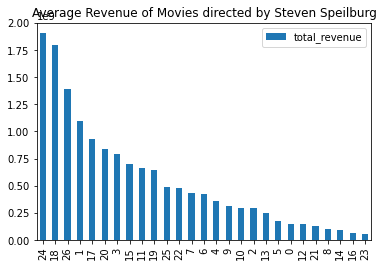

In [36]:
StevenSp[['total_revenue']].plot(kind='bar', sort_columns='True', title='Average Revenue of Movies directed by Steven Speilburg');

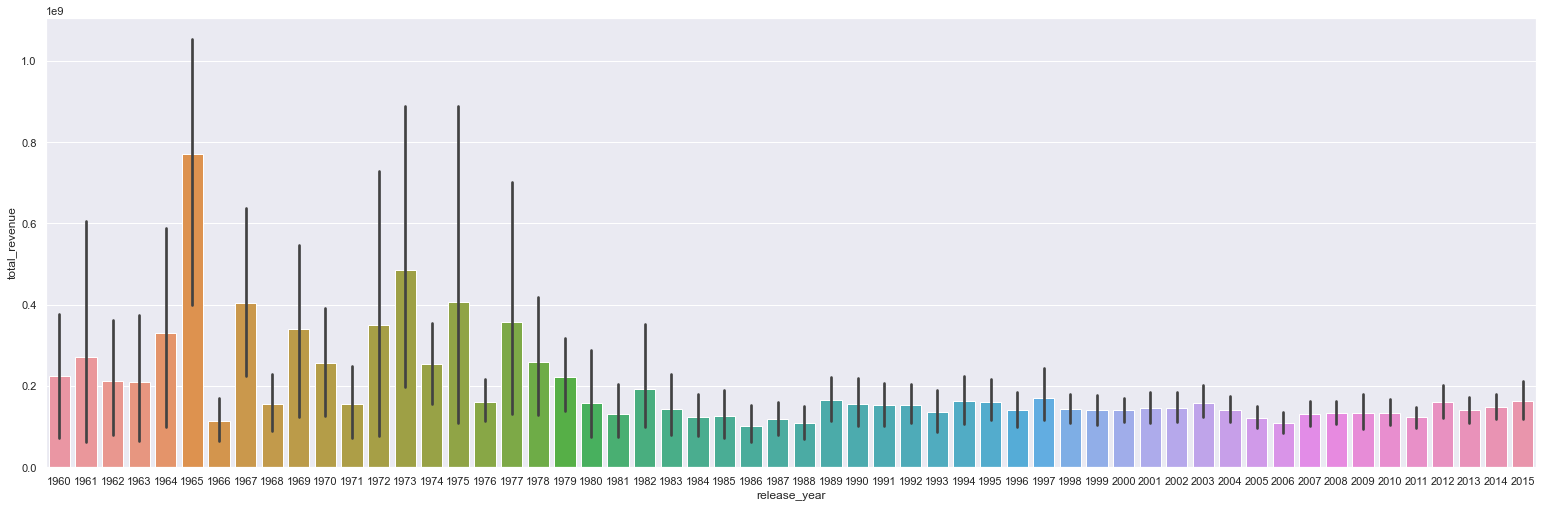

In [37]:
sns.set(rc={'figure.figsize':(26.7,8.27)})
sns.barplot(x="release_year", y="total_revenue", data=df_q2);

In [38]:
df_q2['total_revenue'].mean()

148448631.16558233

In [39]:
revenue_corr = df_q2.copy(deep=True)
# create a correlation matrix
revenue_corr=df_q2.copy(deep=True)
revenue_corr['total_revenue'] = revenue_corr['total_revenue'].astype(str).astype('float64')
revenue_corr['total_budget'] = revenue_corr['total_budget'].astype(str).astype('float64')
revenue_corr.drop(columns=['id'], inplace=True)
revenue_corr =revenue_corr.corr()

C:\Users\aruna\AppData\Local\Temp\ipykernel_5072\809028771.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(revenue_corr_1,fraction=0.02)


<Figure size 936x936 with 0 Axes>

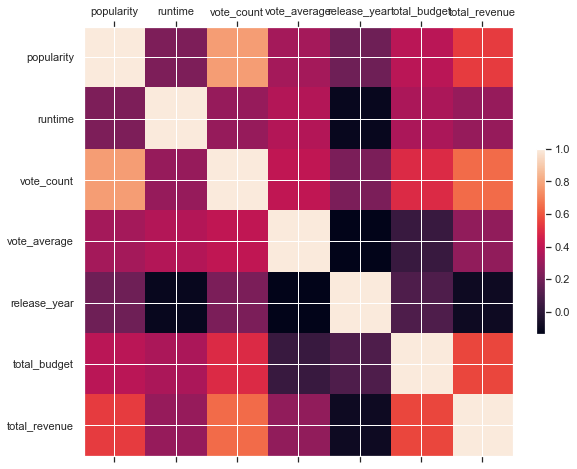

In [40]:
# Plot the matrix using following configerations

plt.figure(figsize=(13,13))
revenue_corr_1=plt.matshow(revenue_corr,fignum=4)
plt.xticks(range(len(revenue_corr.columns)),revenue_corr.columns)
plt.yticks(range(len(revenue_corr.columns)),revenue_corr.columns)
plt.colorbar(revenue_corr_1,fraction=0.02)
plt.show();

In [41]:
#create new dataframe for this question.
df_q1 = df.copy(deep=True)

In [42]:
df_q1.drop(df_q1.columns.difference(['popularity', 'original_title','genres','release_year']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df_q1.genres = df_q1.genres.str.split('|')

C:\Users\aruna\AppData\Local\Temp\ipykernel_5072\445859351.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_q1.drop(df_q1.columns.difference(['popularity', 'original_title','genres','release_year']), 1, inplace=True)


In [43]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [44]:
#Dropping null values and calling the explode function
df_q1.dropna(inplace = True);
df_q1 = explode(df_q1, ['genres'])
# What are the most popular genres 


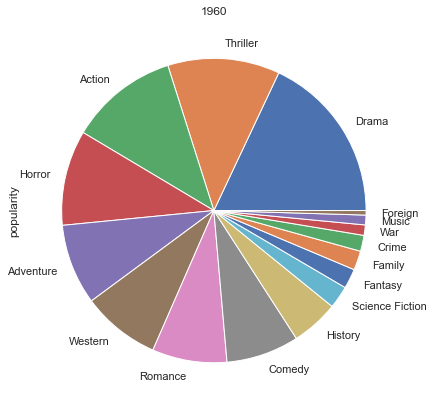

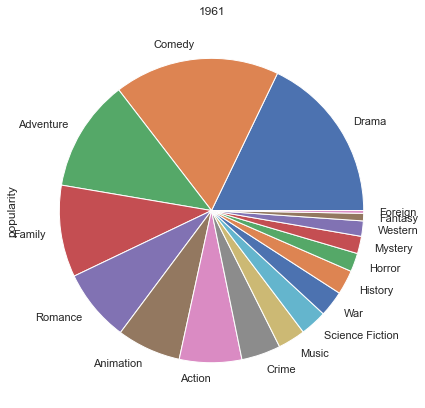

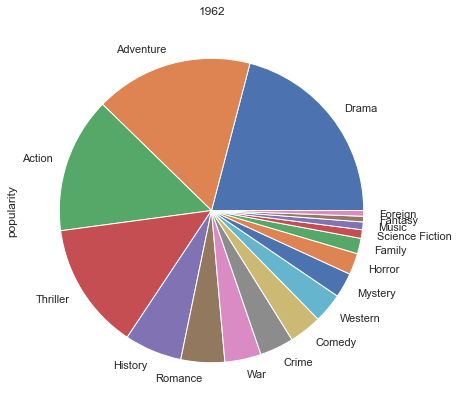

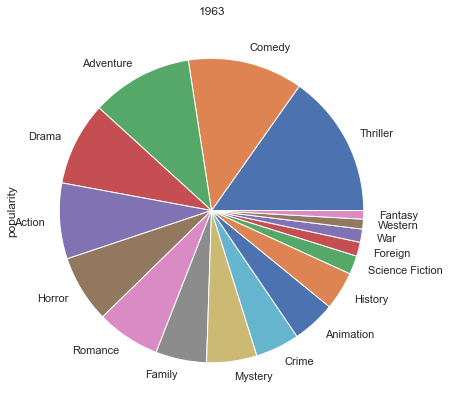

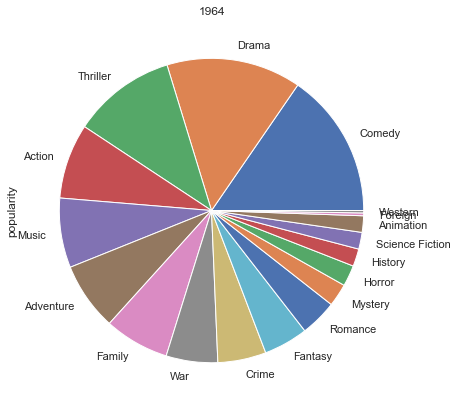

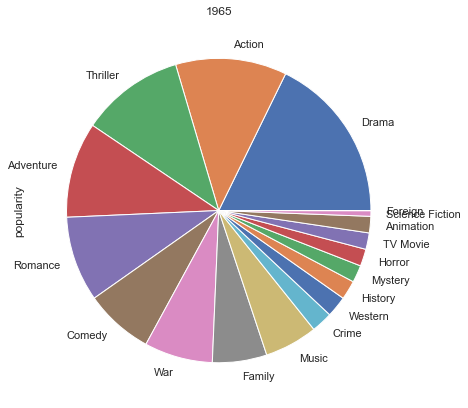

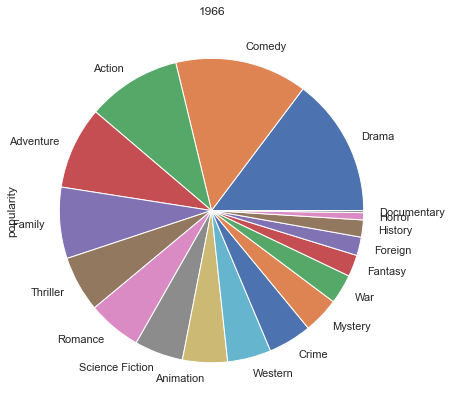

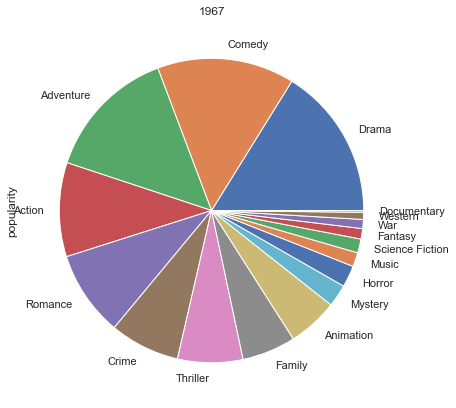

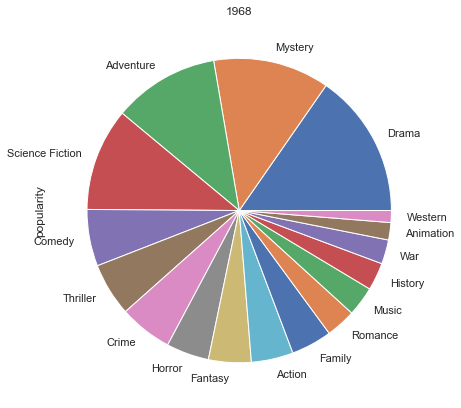

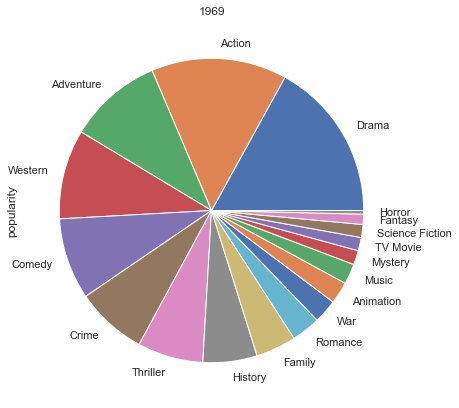

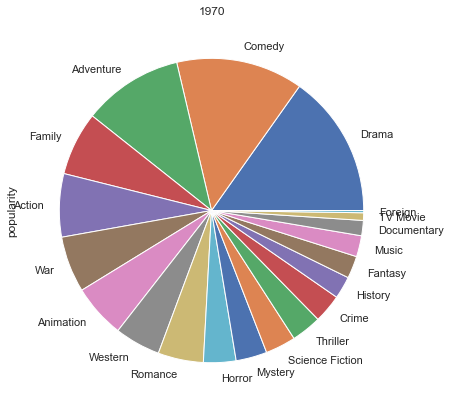

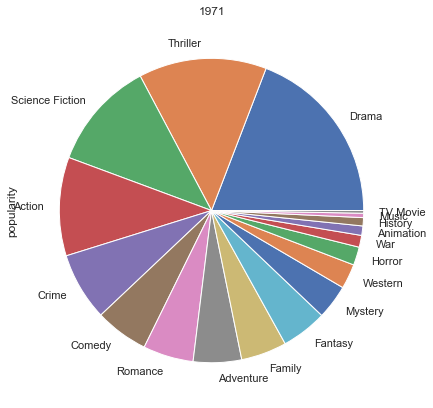

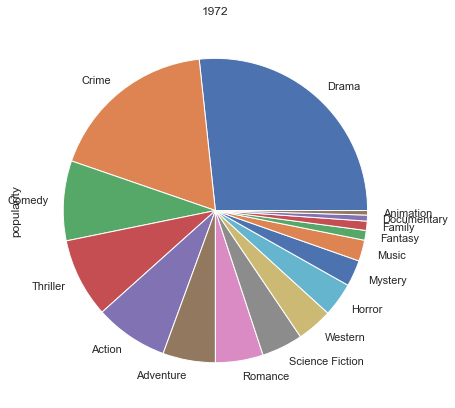

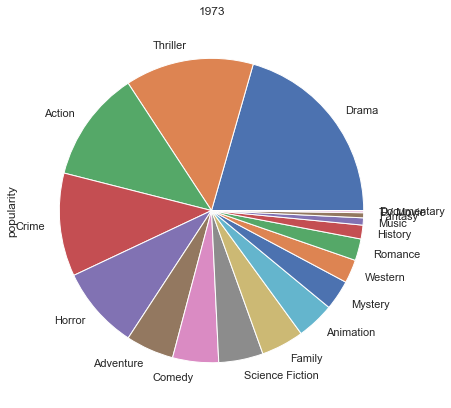

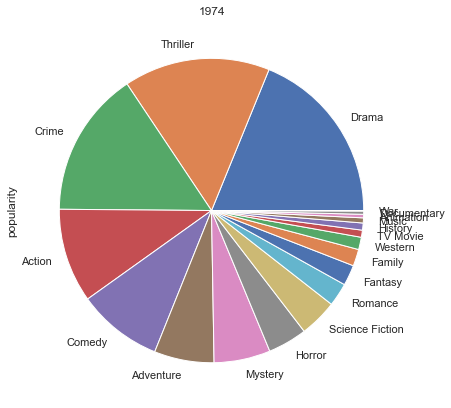

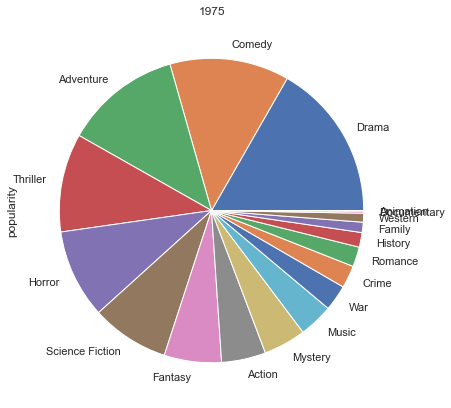

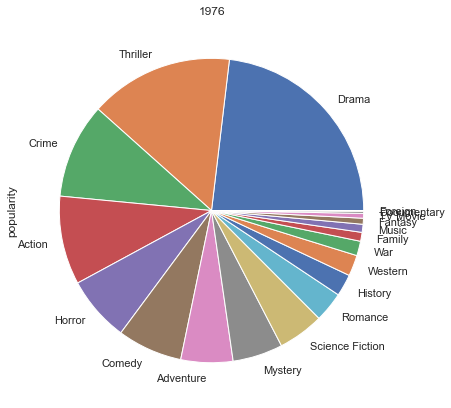

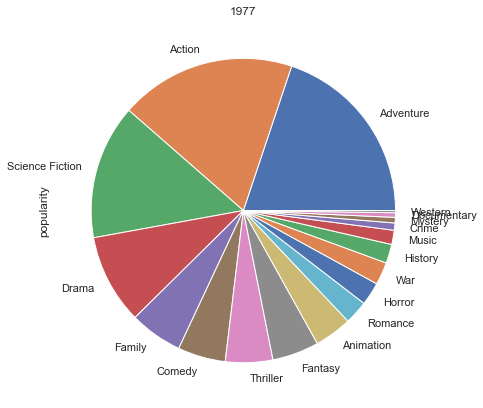

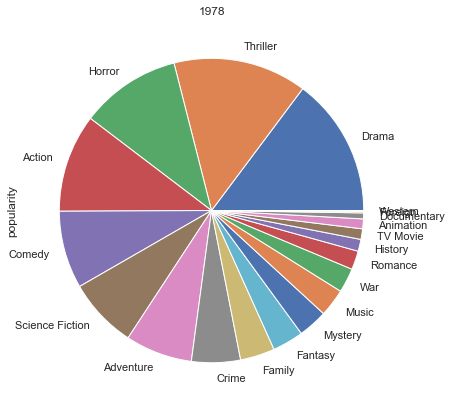

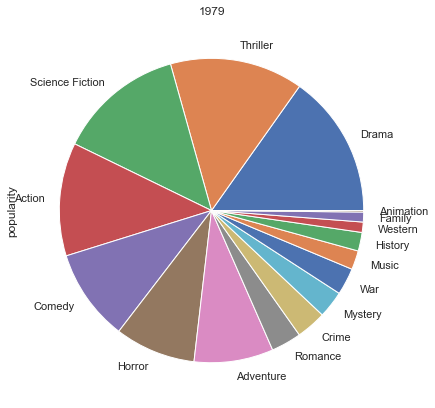

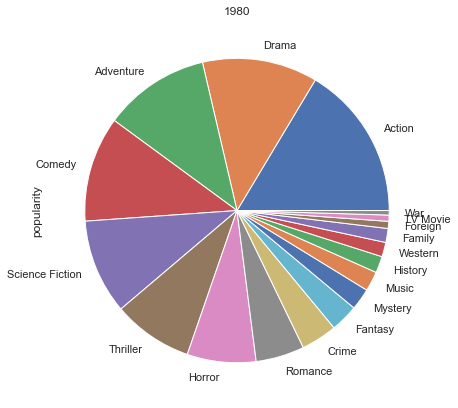

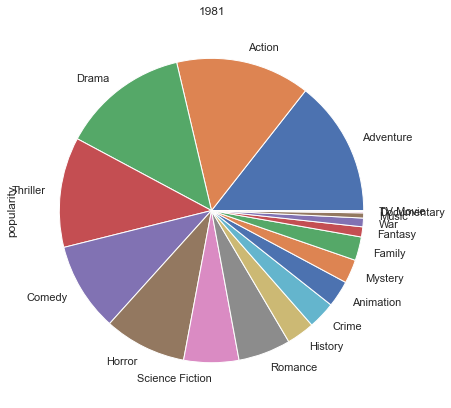

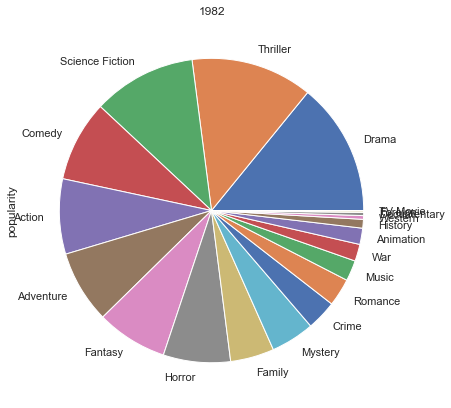

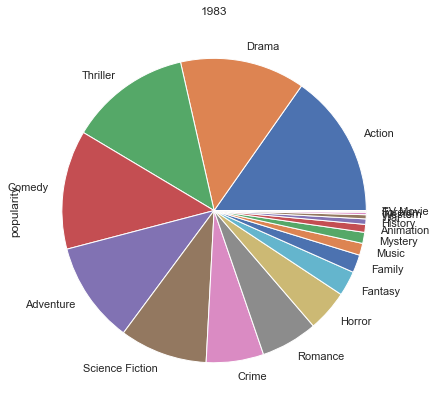

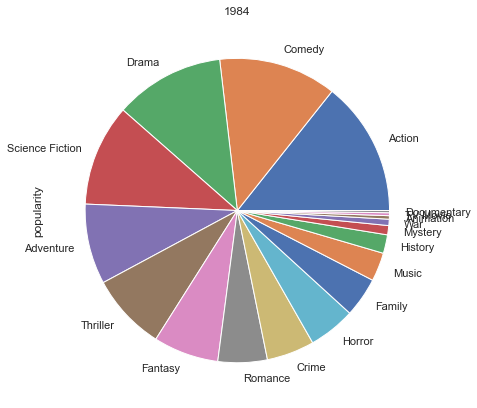

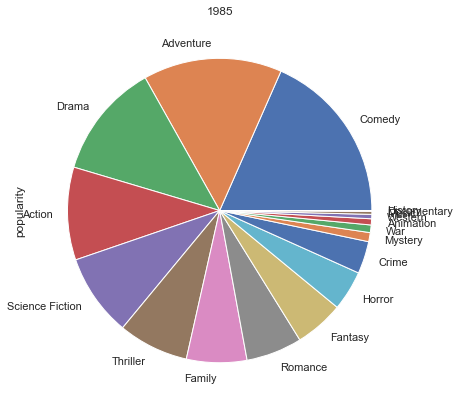

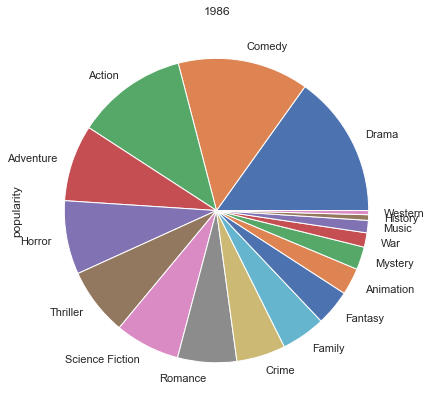

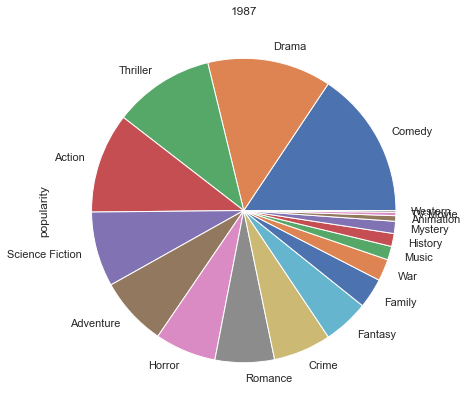

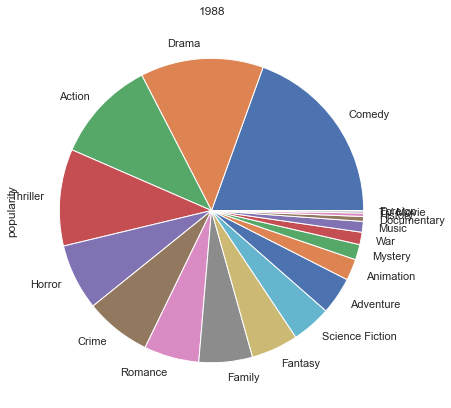

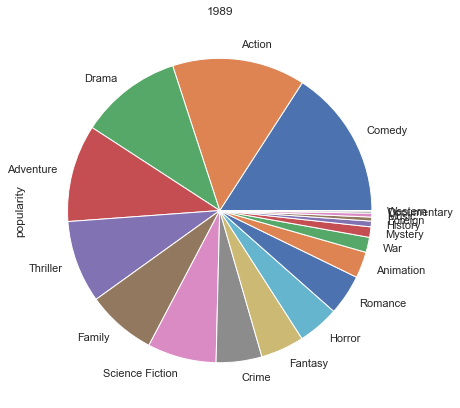

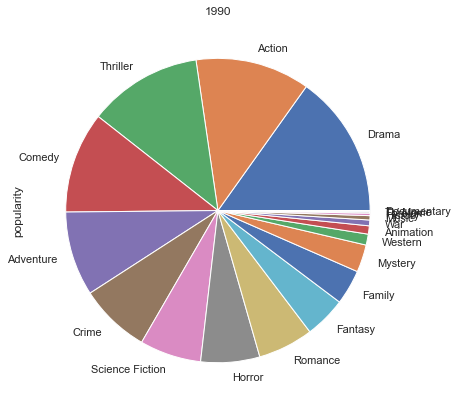

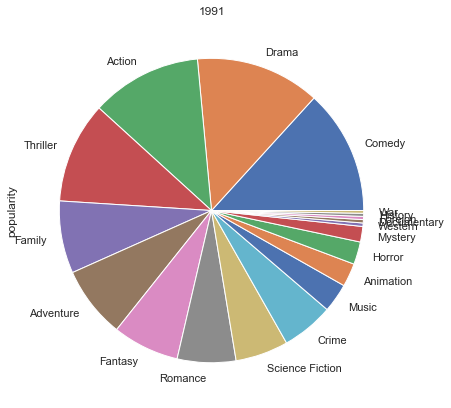

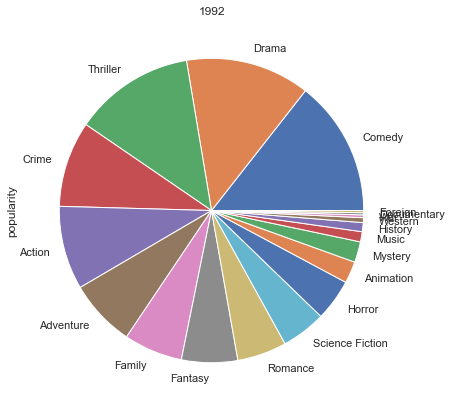

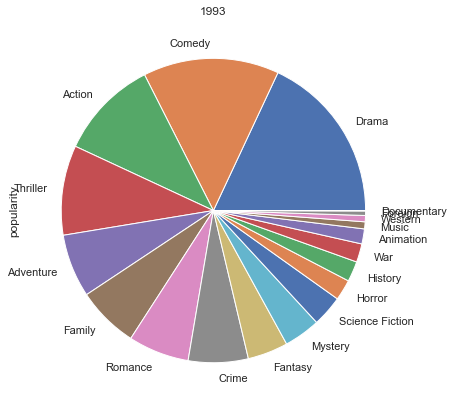

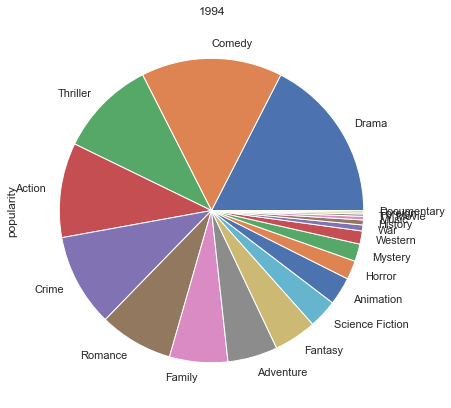

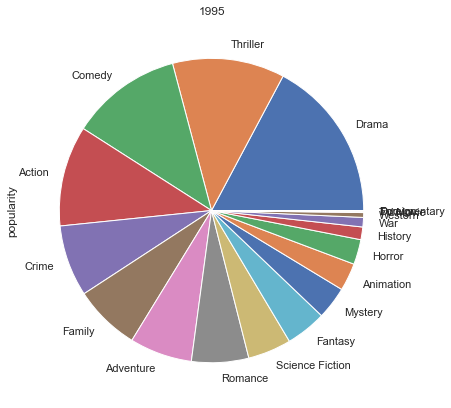

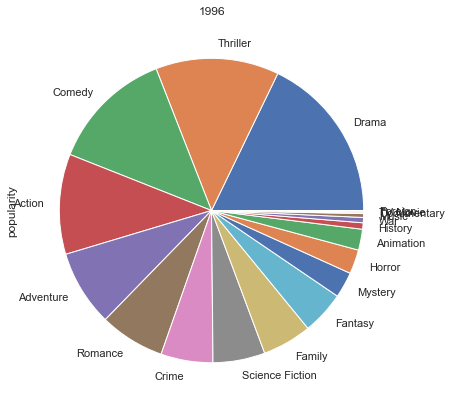

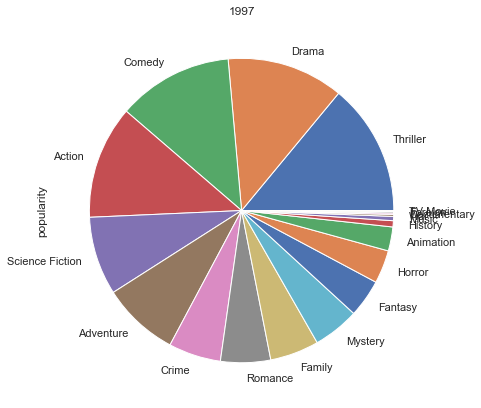

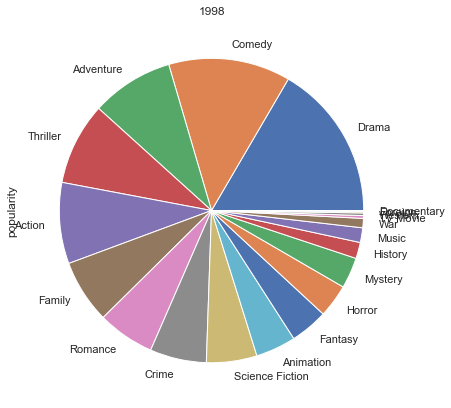

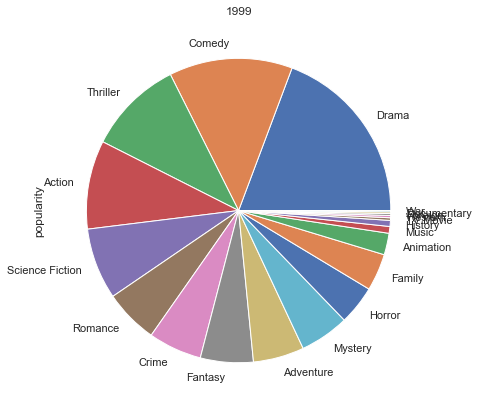

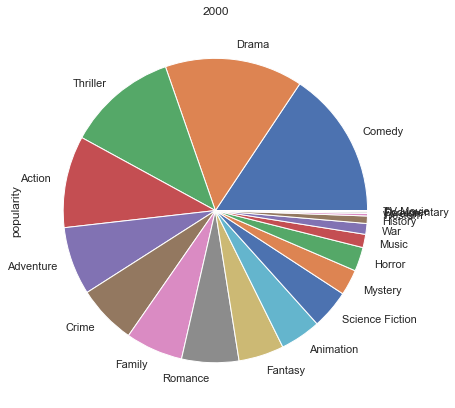

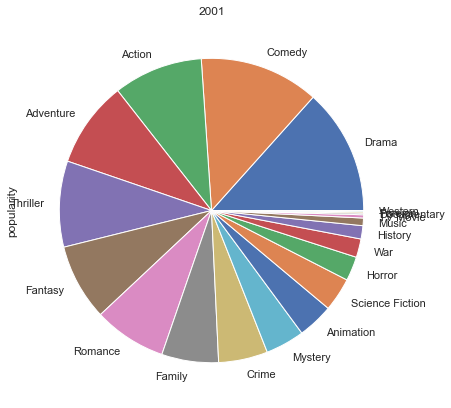

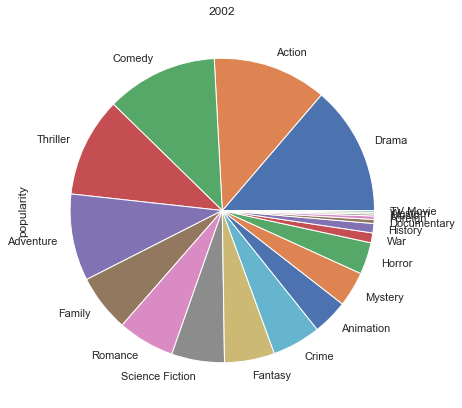

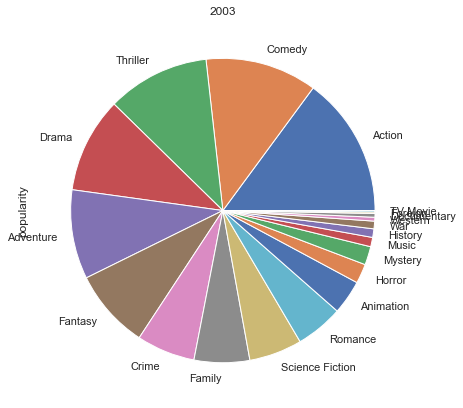

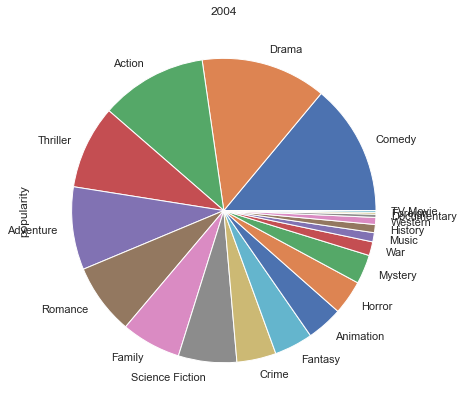

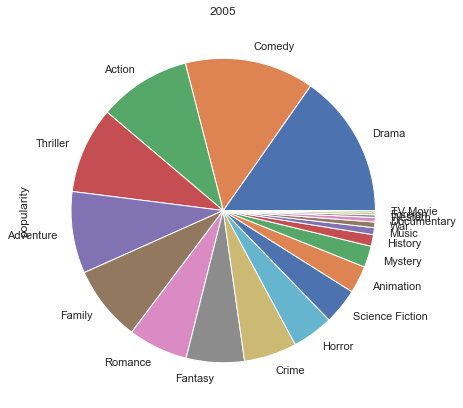

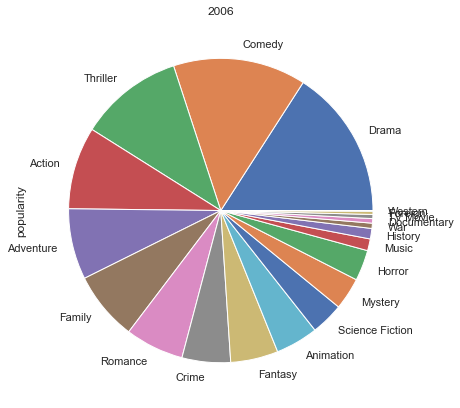

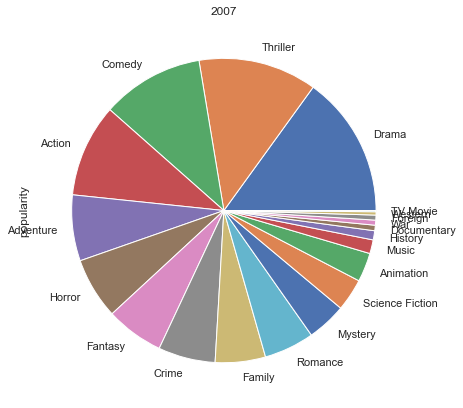

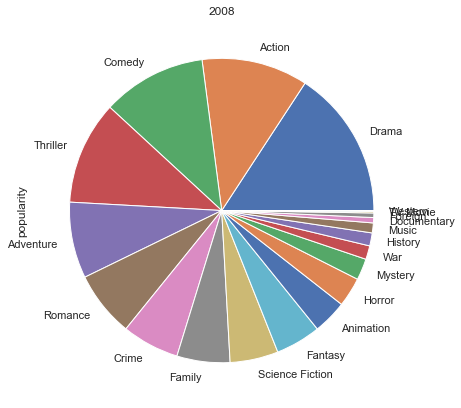

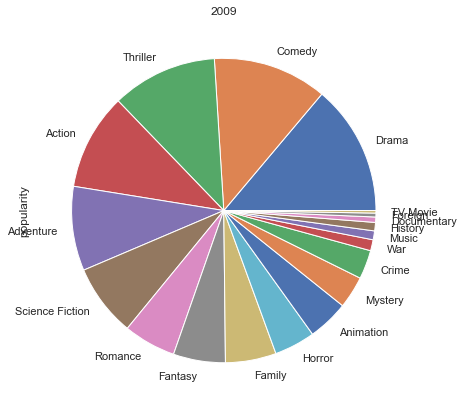

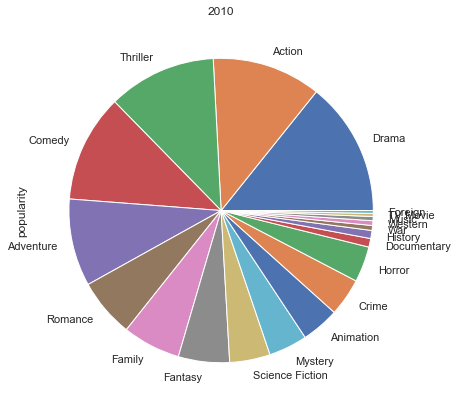

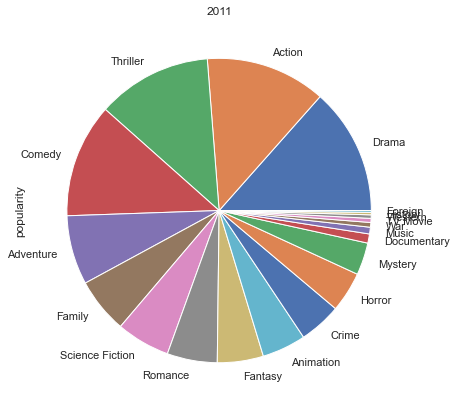

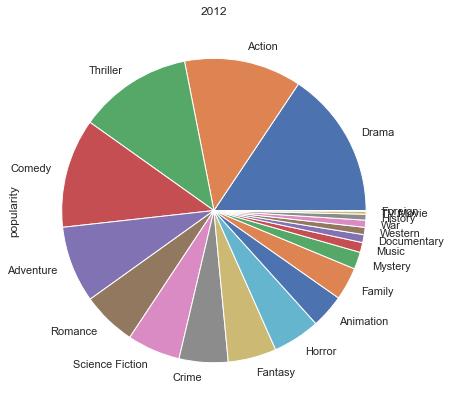

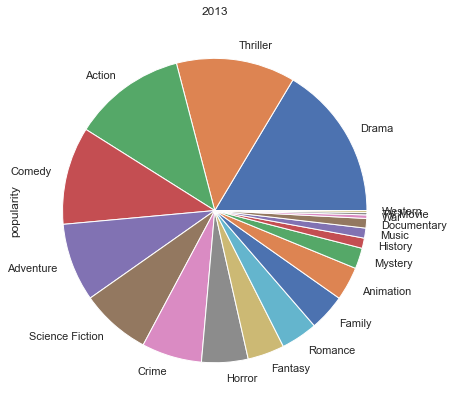

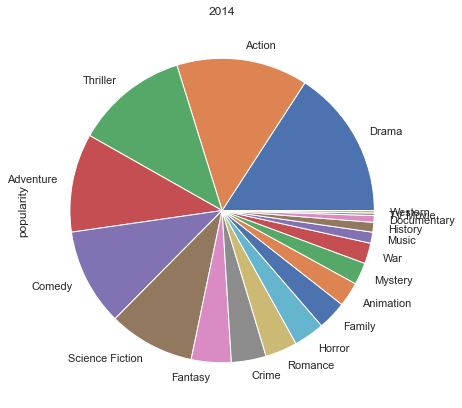

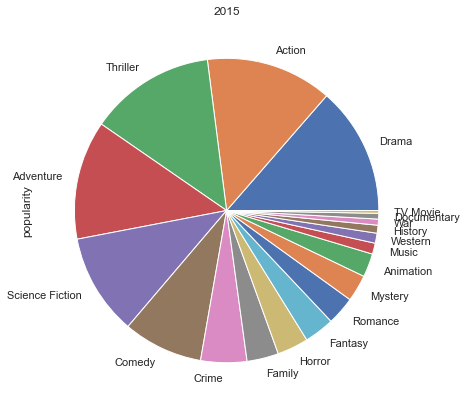

In [46]:
# We first extract all the years present in the dataframe and sort them. 
years = df_q1['release_year'].unique()
years.sort()
# We then loop over these subsequent years and extract the movies from that particular year and group them by 
# their popularity(sum). We then plot each using a pie chart. 
for i in years:
    genre_popularity = df_q1[df_q1['release_year'] == i]
    genre_popularity = (genre_popularity.groupby('genres')['popularity'].sum()).sort_values(ascending=False)
    genre_popularity.plot(kind='pie', figsize=(7,7));
    plt.title(i)
    plt.show()

In [47]:
df_q3 = df.copy(deep=True)
df_q3 =df_q3.drop(df_q3.columns.difference(['vote_count','vote_average','release_year']), 1)

C:\Users\aruna\AppData\Local\Temp\ipykernel_5072\1794025384.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_q3 =df_q3.drop(df_q3.columns.difference(['vote_count','vote_average','release_year']), 1)


In [48]:
votes =(df_q3.groupby('release_year', sort=True).mean())
#y = df_q3.groupby('genres')['popularity'].sum()

In [49]:
votes.head(4)

,vote_count,vote_average
release_year,,
1960,77.531250,6.325000
1961,77.580645,6.374194
1962,74.750000,6.343750
1963,82.823529,6.329412


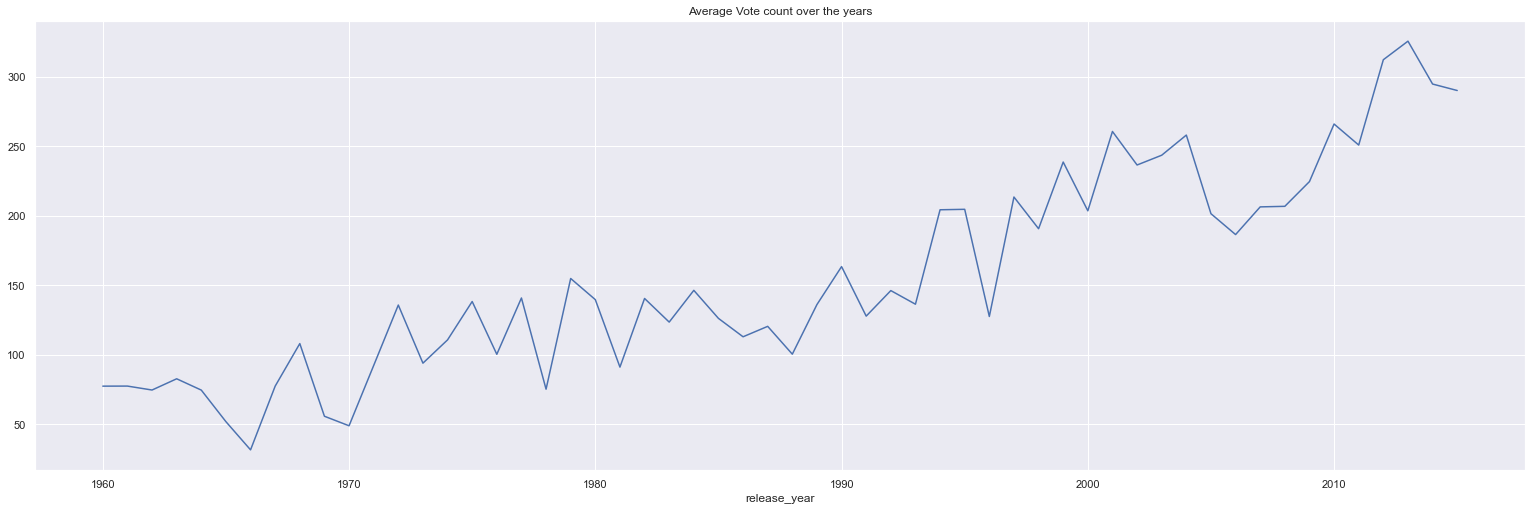

In [50]:
votes['vote_count'].plot(title='Average Vote count over the years');


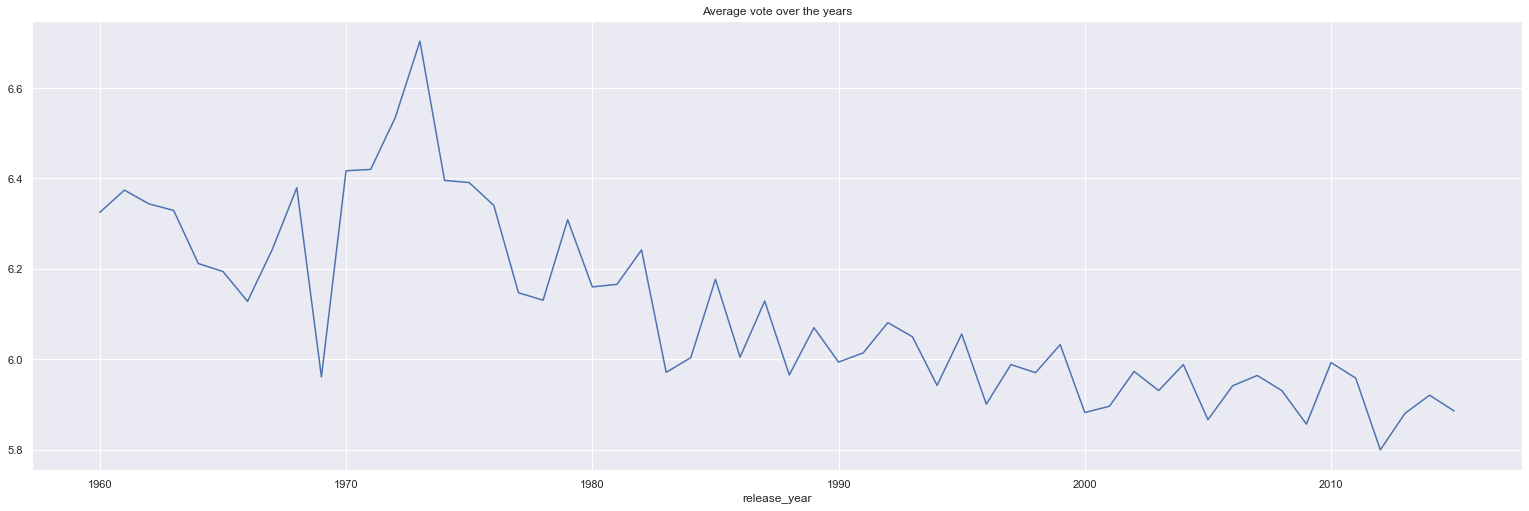

In [51]:
votes['vote_average'].plot( title='Average vote over the years');